# __Heart Disease Prediction__

This notebook aims to build a model that predicts the probability of one having a heart disease, based on the few given features. Amongst the given features are:
1. `Age`
2. `Sex`
3. `Cp` (Chest Pain Type)
4. `Trestbps` (Resting Blood Pressure)
5. `chol` (serum cholestoral in mg/dl)
6. `fbs` (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
7. `restecg` (resting electrocardiographic results)
8. `thalach` (maximum heart rate achieved)
9. `exang` (exercise induced angina) (1 = yes; 0 = no)
10. `oldpeak` (ST depression induced by exercise relative to rest)
11. `slope` (the slope of the peak exercise ST segment)
12. `ca` (number of major vessels (0-3) colored by flourosopy)
13. `thal` (3 = normal; 6 = fixed defect; 7 = reversable defect)
14. `target` (1 = heart disease, 0 = well)

## __Importing the data__
CSV -> Pandas Dataframe using `pd.read_csv()`

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('../Data/heart.csv')
df.name
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
target_names = ['Heart Disease', 'Healthy']
df_series = df['target'].value_counts()
df_series.index = target_names
df_series

Heart Disease    165
Healthy          138
Name: target, dtype: int64

# __Report__

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


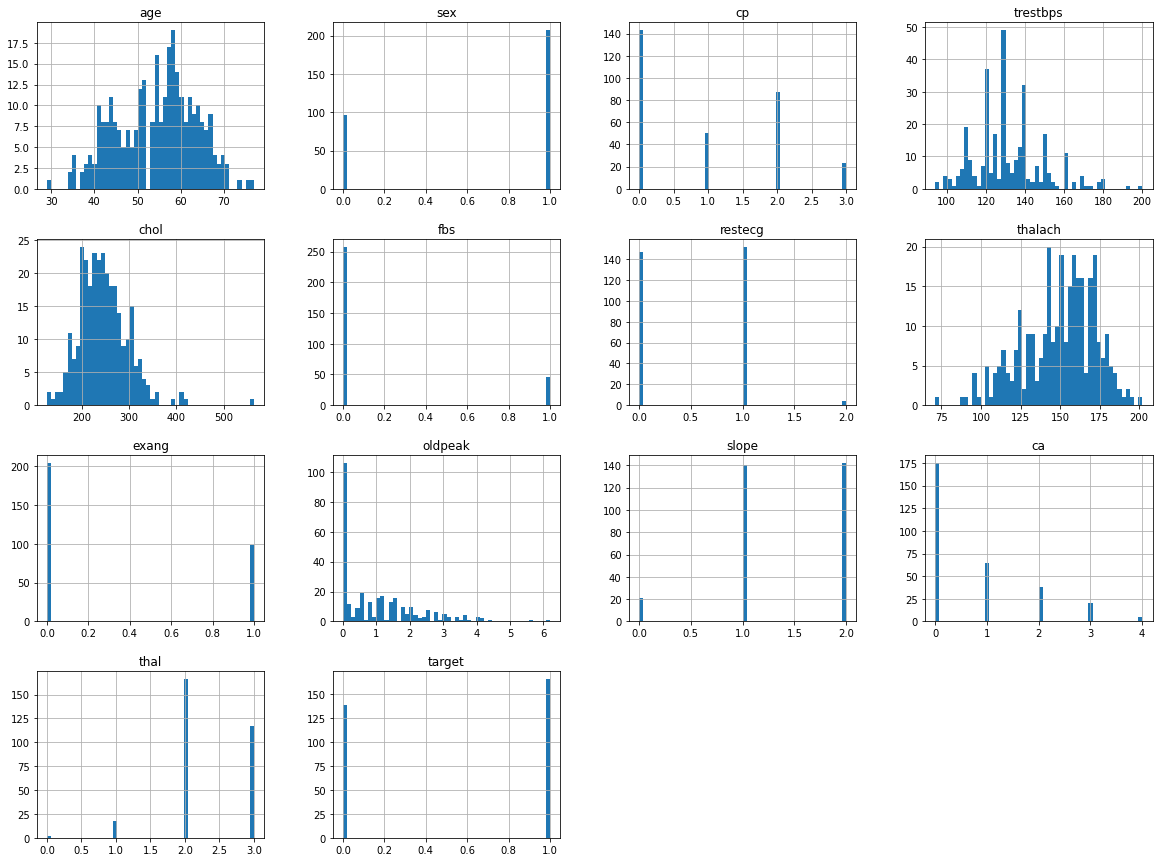

In [5]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:xlabel='trestbps', ylabel='target'>

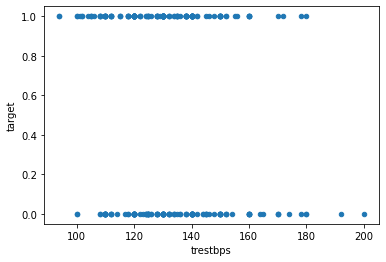

In [6]:
df.plot(kind="scatter", x="trestbps", y="target")

<AxesSubplot:title={'center':'trestbps'}, xlabel='[target]'>

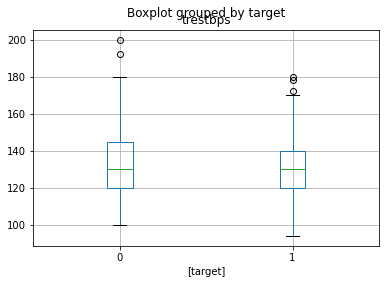

In [7]:
df.boxplot(column=['trestbps'], by=['target'])

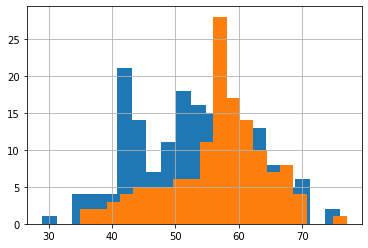

In [8]:
heart_sick = df[df['target']==1]
heart_well = df[df['target']==0]
heart_sick['age'].hist(bins=20)
heart_well['age'].hist(bins=20)
plt.show()

interval columns not set, guessing: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


<AxesSubplot:>

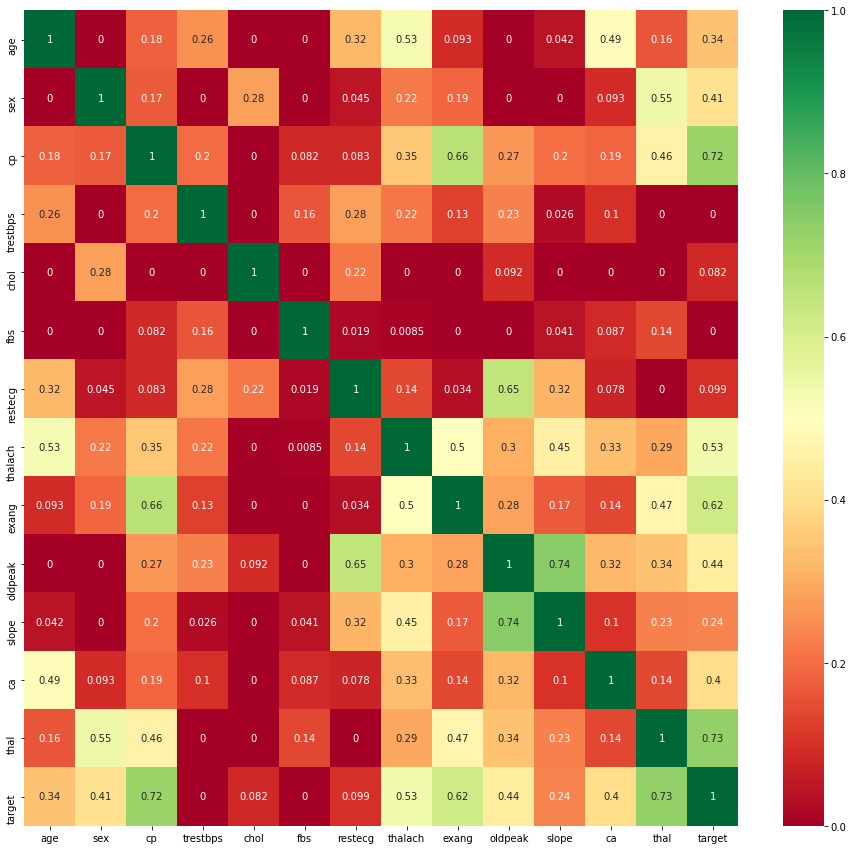

In [9]:
import phik
import seaborn as sns
corr1 = df.phik_matrix()
plt.figure(figsize = (16,15))
sns.heatmap(corr1, annot=True, cmap="RdYlGn")

In [10]:
corr1["target"].sort_values(ascending=False)

target      1.000000
thal        0.730110
cp          0.717290
exang       0.620992
thalach     0.534085
oldpeak     0.437864
sex         0.408884
ca          0.398306
age         0.343086
slope       0.238242
restecg     0.098589
chol        0.082487
trestbps    0.000000
fbs         0.000000
Name: target, dtype: float64

## __Running Naive Bayes Algorithms on the Origial Data Set__

In [57]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
from sklearn.metrics import plot_roc_curve
mnb = MultinomialNB()

def getConfMatClassReport(df_param):
    df_shuffle = shuffle(df_param)
    X = df_shuffle.drop(['target'], axis=1)
    y = df_shuffle['target']
    model = mnb.fit(X,y)
    y_pred = model.predict(X)
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    print("tn:", tn, " fp: ", fp, " fn: ", fn, " tp: ", tp)
    print(classification_report(y, y_pred))
    plot_roc_curve(model, X, y)
    plt.plot([0,1],[0,1], 'r--')
    plt.show()
    print()

Performance data for: Dataset with all features
tn: 97  fp:  41  fn:  34  tp:  131
              precision    recall  f1-score   support

           0       0.74      0.70      0.72       138
           1       0.76      0.79      0.78       165

    accuracy                           0.75       303
   macro avg       0.75      0.75      0.75       303
weighted avg       0.75      0.75      0.75       303



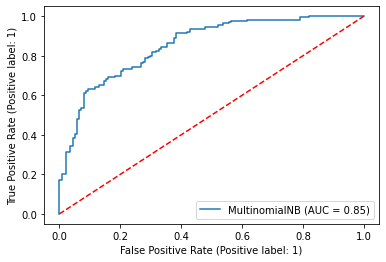

In [28]:
print("Performance data for: Dataset with all features")
getConfMatClassReport(df)

## __Comparison between 3, 5, 7 features for Training & Testing__

In [60]:
feature_3 = df[["target", "thal", "cp", "exang"]]
feature_5 = df[["target", "thal", "cp", "exang", "thalach", "oldpeak"]]
feature_7 = df[["target", "thal", "cp", "exang", "thalach", "oldpeak", "sex", "ca"]]
feature_9 = df[["target", "thal", "cp", "exang", "thalach", "oldpeak", "sex", "ca", "age", "slope"]]
feature_compare = [feature_3, feature_5, feature_7, feature_9]

Preformance stats for 3 Features
-----------------------------------------------------
tn: 105  fp:  33  fn:  42  tp:  123
              precision    recall  f1-score   support

           0       0.71      0.76      0.74       138
           1       0.79      0.75      0.77       165

    accuracy                           0.75       303
   macro avg       0.75      0.75      0.75       303
weighted avg       0.75      0.75      0.75       303



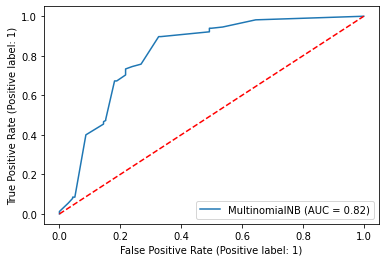


Preformance stats for 5 Features
-----------------------------------------------------
tn: 100  fp:  38  fn:  19  tp:  146
              precision    recall  f1-score   support

           0       0.84      0.72      0.78       138
           1       0.79      0.88      0.84       165

    accuracy                           0.81       303
   macro avg       0.82      0.80      0.81       303
weighted avg       0.81      0.81      0.81       303



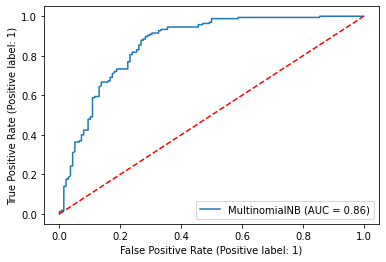


Preformance stats for 7 Features
-----------------------------------------------------
tn: 102  fp:  36  fn:  16  tp:  149
              precision    recall  f1-score   support

           0       0.86      0.74      0.80       138
           1       0.81      0.90      0.85       165

    accuracy                           0.83       303
   macro avg       0.83      0.82      0.82       303
weighted avg       0.83      0.83      0.83       303



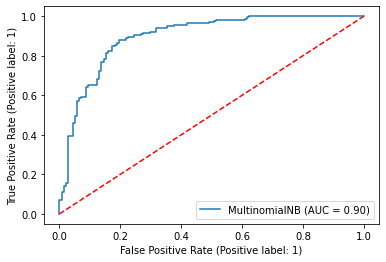


Preformance stats for 9 Features
-----------------------------------------------------
tn: 101  fp:  37  fn:  28  tp:  137
              precision    recall  f1-score   support

           0       0.78      0.73      0.76       138
           1       0.79      0.83      0.81       165

    accuracy                           0.79       303
   macro avg       0.79      0.78      0.78       303
weighted avg       0.79      0.79      0.78       303



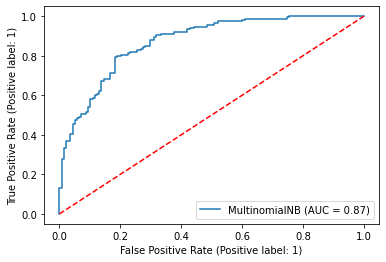

In [61]:
i = 3
for item in feature_compare:
    print("="*53)
    print("Preformance stats for", i, "Features"); i += 2
    print("-"*53)
    getConfMatClassReport(item)
    